In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('TitanicPassengersClassificationDataset/train.csv')
test = pd.read_csv('TitanicPassengersClassificationDataset/test.csv')

print(train.shape, test.shape)

train.head()

(891, 12) (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Проверка пропусков в трейн датасете

In [7]:
missing = train.isnull().sum()
missing_percent = (missing / len(train)) * 100

In [8]:
missing_df = pd.DataFrame({'missing': missing, 'percent' : missing_percent})
missing_df = missing_df[missing_df['missing'] > 0].sort_values('percent', ascending=True)
print(missing_df)

          missing    percent
Embarked        2   0.224467
Age           177  19.865320
Cabin         687  77.104377


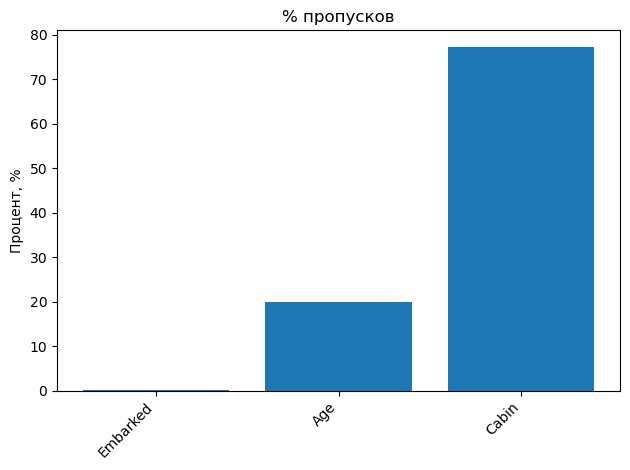

In [9]:
plt.bar(missing_df.index, missing_df['percent'])
plt.title('% пропусков')
plt.ylabel('Процент, %')
plt.xlabel('') 
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

# Распределение выживших

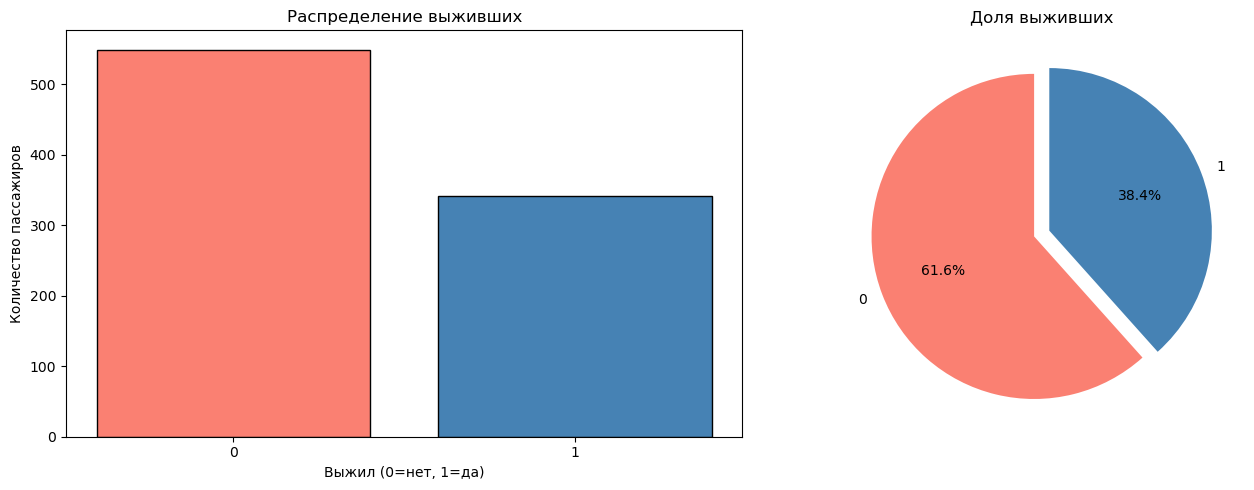

Процент выживших: 38.38%


In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

counts = train['Survived'].value_counts().sort_index()  
axes[0].bar(counts.index, counts.values, color=['salmon', 'steelblue'], edgecolor='black')
axes[0].set_title('Распределение выживших')
axes[0].set_xlabel('Выжил (0=нет, 1=да)')
axes[0].set_ylabel('Количество пассажиров')
axes[0].set_xticks([0, 1])  

train['Survived'].value_counts().plot(
    kind='pie',
    ax=axes[1],
    autopct='%1.1f%%',  
    startangle=90,
    colors=['salmon', 'steelblue'],
    explode=(0.05, 0.05) 
)
axes[1].set_title('Доля выживших')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print(f"Процент выживших: {train['Survived'].mean()*100:.2f}%")

# Распределения фичей

## Числовых

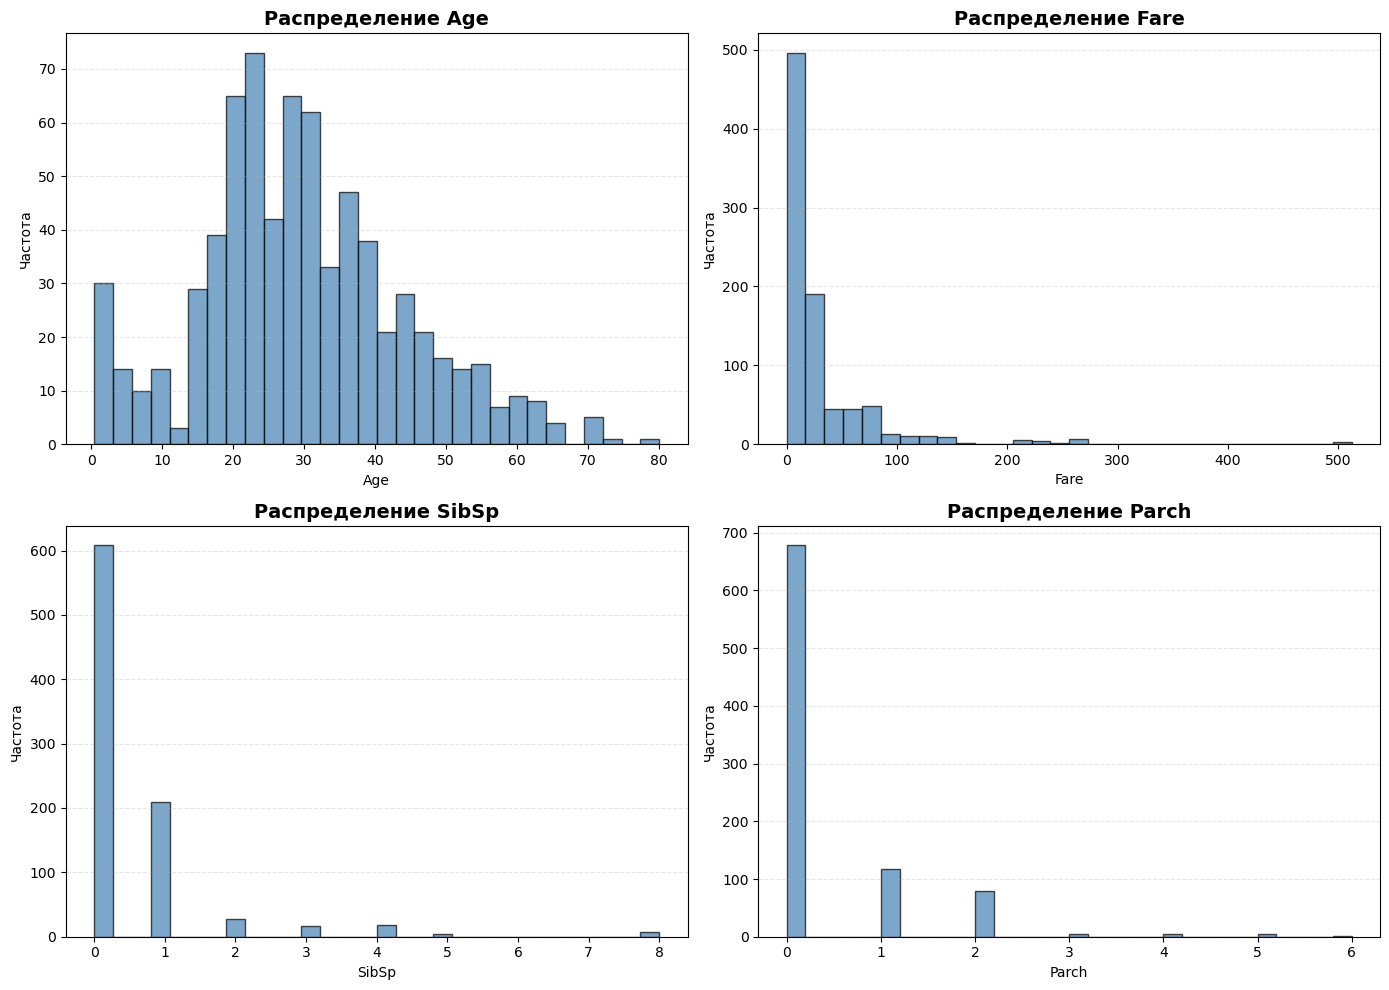

              Age        Fare       SibSp       Parch
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118   32.204208    0.523008    0.381594
std     14.526497   49.693429    1.102743    0.806057
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    7.910400    0.000000    0.000000
50%     28.000000   14.454200    0.000000    0.000000
75%     38.000000   31.000000    1.000000    0.000000
max     80.000000  512.329200    8.000000    6.000000


In [11]:
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, col in enumerate(numeric_cols):
    row = idx // 2
    col_pos = idx % 2
    ax = axes[row, col_pos]
    
    data = train[col].dropna()
    
    ax.hist(
        data,
        bins=30,
        edgecolor='black',
        alpha=0.7,
        color='steelblue'
    )
    
    ax.set_title(f'Распределение {col}', fontsize=14, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Частота')
    ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print(train[numeric_cols].describe())

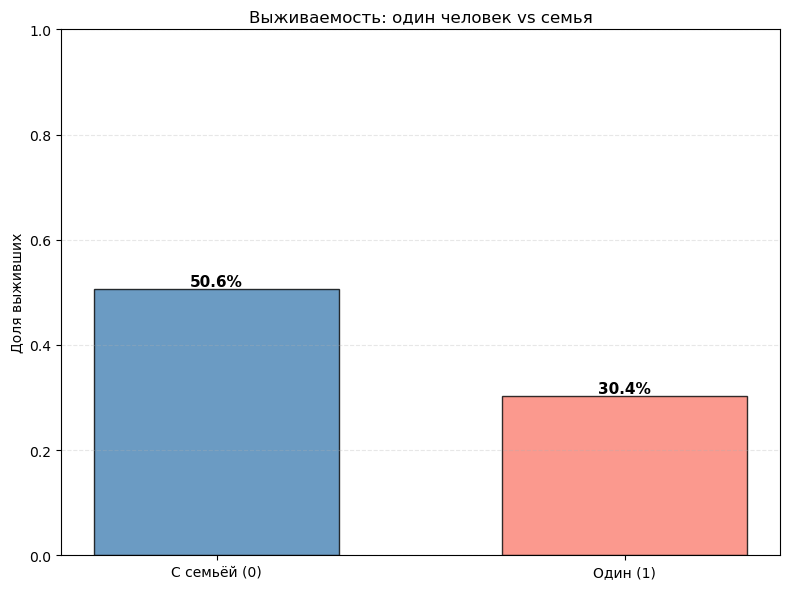

Выжили одни: 30.4%
Выжили с семьёй: 50.6%


In [12]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)

survival_by_group = train.groupby('IsAlone')['Survived'].mean()

plt.figure(figsize=(8, 6))

bars = plt.bar(
    survival_by_group.index,           
    survival_by_group.values,          
    color=['steelblue', 'salmon'],     
    edgecolor='black',
    width=0.6,
    alpha=0.8
)

labels = ['С семьёй (0)', 'Один (1)']
plt.xticks([0, 1], labels)
plt.ylabel('Доля выживших')
plt.title('Выживаемость: один человек vs семья')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{height*100:.1f}%',  
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim(0, 1)  
plt.tight_layout()
plt.show()

print(f"Выжили одни: {train[train['IsAlone']==1]['Survived'].mean()*100:.1f}%")
print(f"Выжили с семьёй: {train[train['IsAlone']==0]['Survived'].mean()*100:.1f}%")

## Категориальных

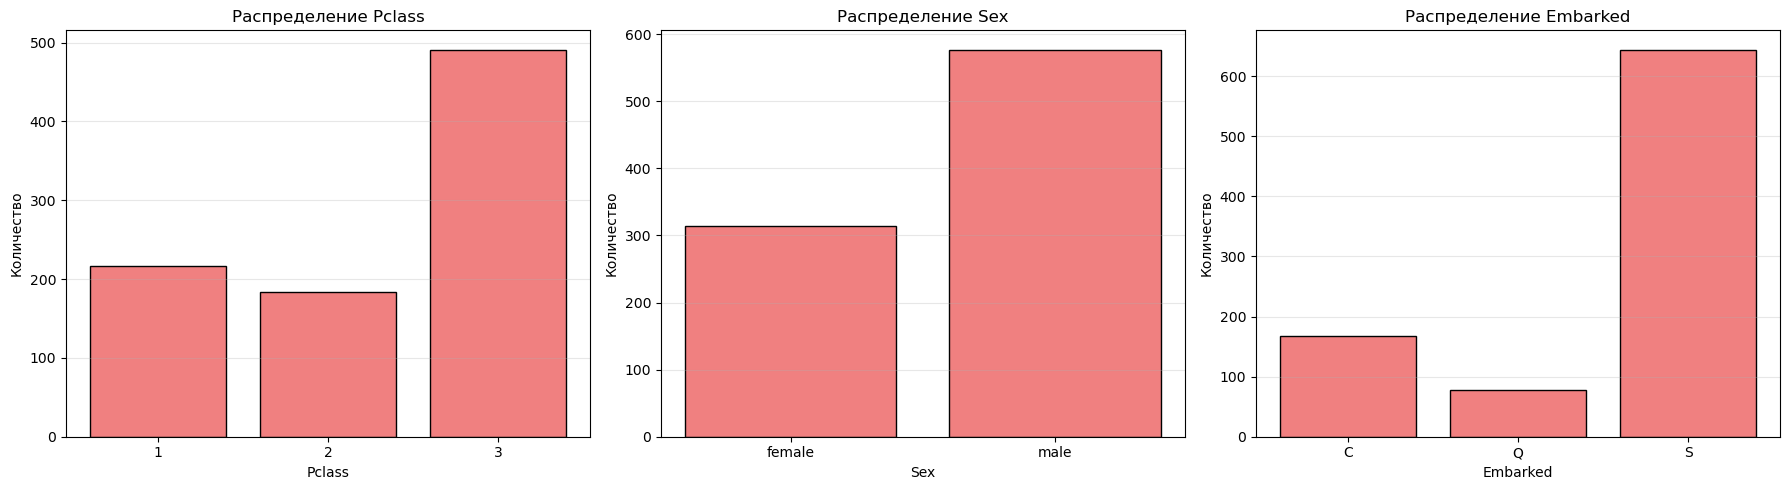


Pclass:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Sex:
Sex
male      577
female    314
Name: count, dtype: int64

Embarked:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [13]:
categorical_cols = ['Pclass', 'Sex', 'Embarked']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(categorical_cols):
    counts = train[col].value_counts().sort_index()
    axes[idx].bar(counts.index.astype(str), counts.values, 
                 color='lightcoral', edgecolor='black')
    axes[idx].set_title(f'Распределение {col}', fontsize=12)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Количество')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

for col in categorical_cols:
    print(f"\n{col}:")
    print(train[col].value_counts())

# Влияние фич

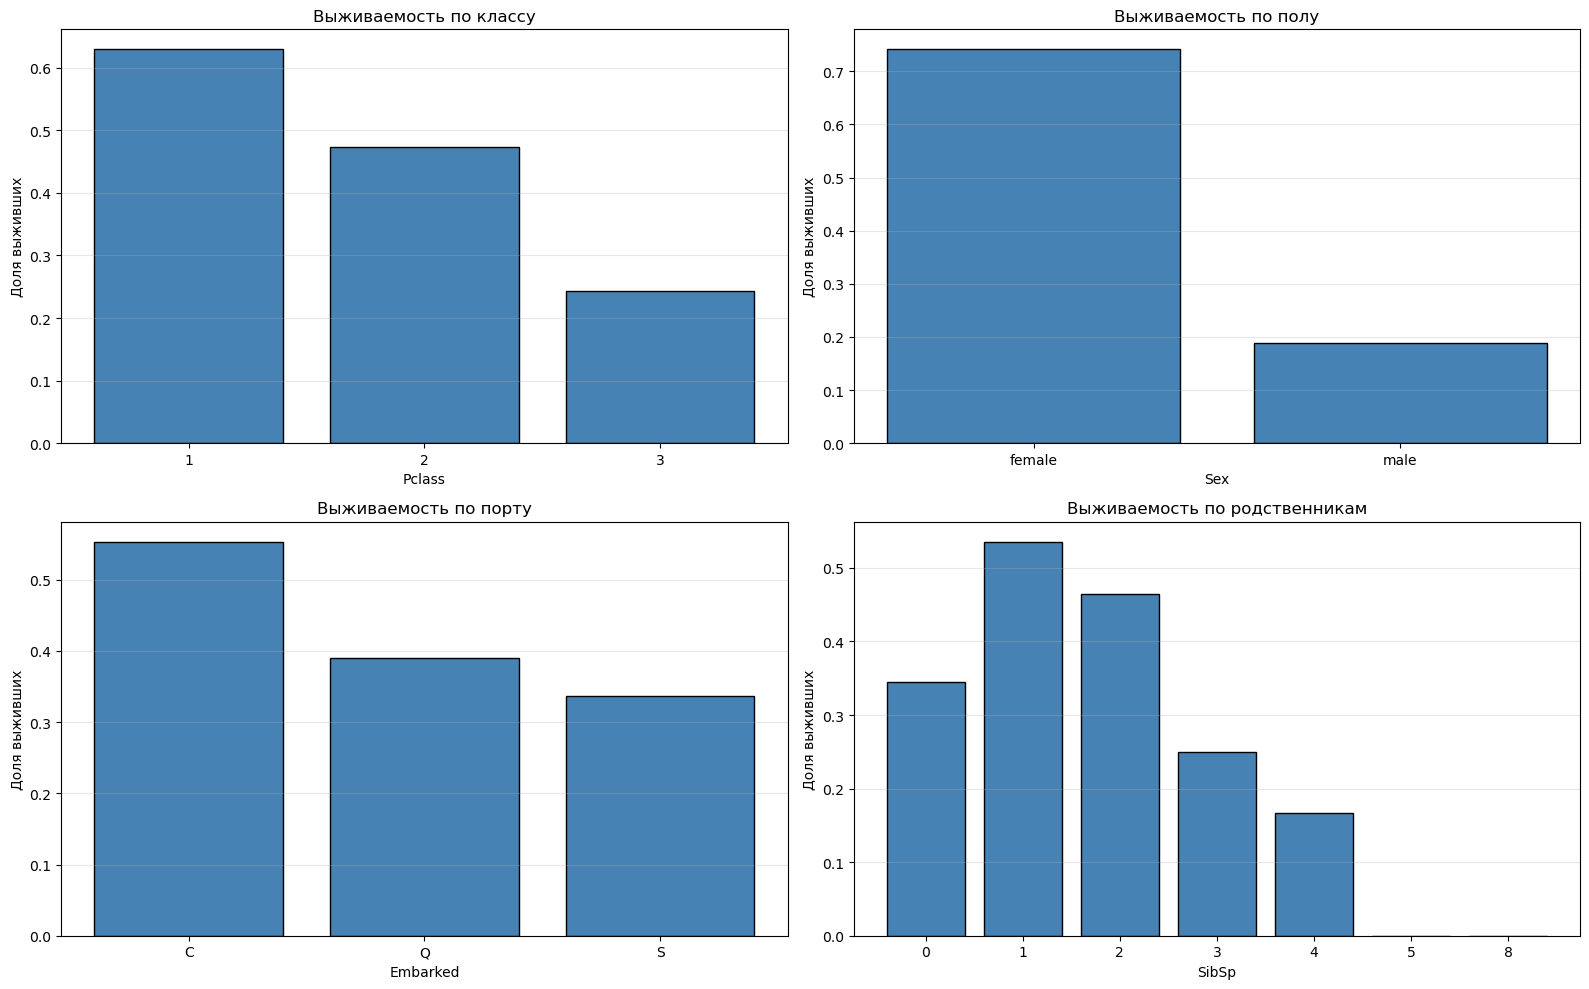

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))  

def plot_survival_rate(df, feature, ax, title):
    rates = df.groupby(feature)['Survived'].mean()
    ax.bar(rates.index.astype(str), rates.values, color='steelblue', edgecolor='black')
    ax.set_title(title, fontsize=12)
    ax.set_xlabel(feature)  
    ax.set_ylabel('Доля выживших')
    ax.grid(axis='y', alpha=0.3)

plot_survival_rate(train, 'Pclass', axes[0, 0], 'Выживаемость по классу')
plot_survival_rate(train, 'Sex', axes[0, 1], 'Выживаемость по полу')
plot_survival_rate(train, 'Embarked', axes[1, 0], 'Выживаемость по порту')
plot_survival_rate(train, 'SibSp', axes[1, 1], 'Выживаемость по родственникам')

plt.tight_layout()
plt.show()

# боксплот по возрасту и выживанию

C:\Users\Mark\AppData\Local\Temp\ipykernel_27560\1352618963.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([age_died, age_survived],


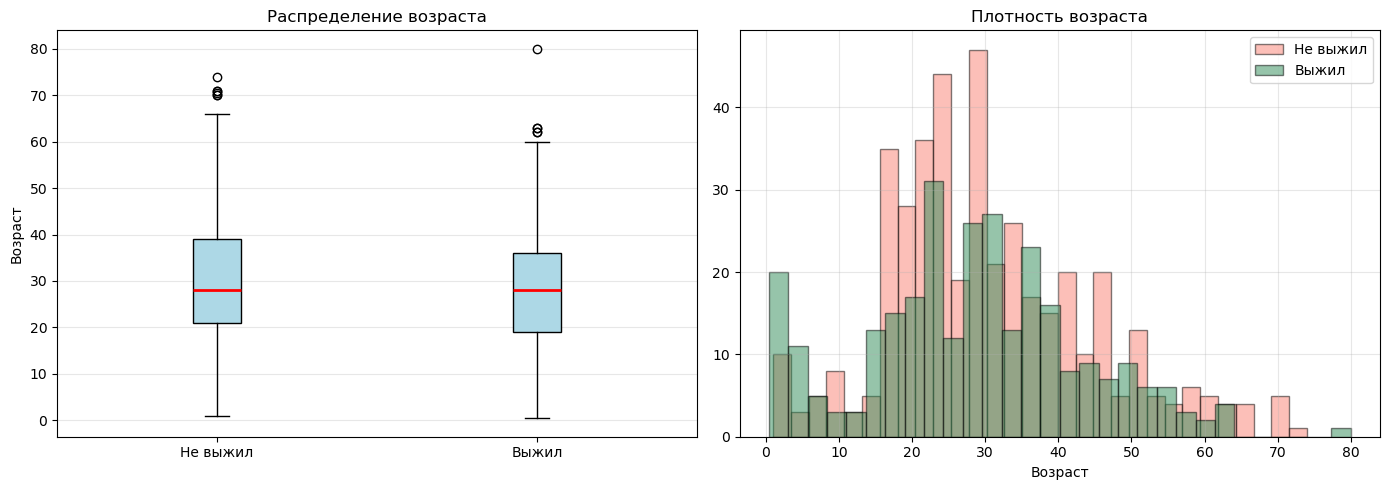

          count       mean        std  median
Survived                                     
0           424  30.626179  14.172110    28.0
1           290  28.343690  14.950952    28.0


In [15]:
age_survived = train[train['Survived']==1]['Age'].dropna()
age_died = train[train['Survived']==0]['Age'].dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].boxplot([age_died, age_survived], 
                labels=['Не выжил', 'Выжил'],
                patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='black'),
                medianprops=dict(color='red', linewidth=2))
axes[0].set_title('Распределение возраста', fontsize=12)
axes[0].set_ylabel('Возраст')
axes[0].grid(axis='y', alpha=0.3)

axes[1].hist(age_died, bins=30, alpha=0.5, label='Не выжил', color='salmon', edgecolor='black')
axes[1].hist(age_survived, bins=30, alpha=0.5, label='Выжил', color='seagreen', edgecolor='black')
axes[1].set_title('Плотность возраста', fontsize=12)
axes[1].set_xlabel('Возраст')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(train.groupby('Survived')['Age'].agg(['count', 'mean', 'std', 'median']))

# корреляционная матрица

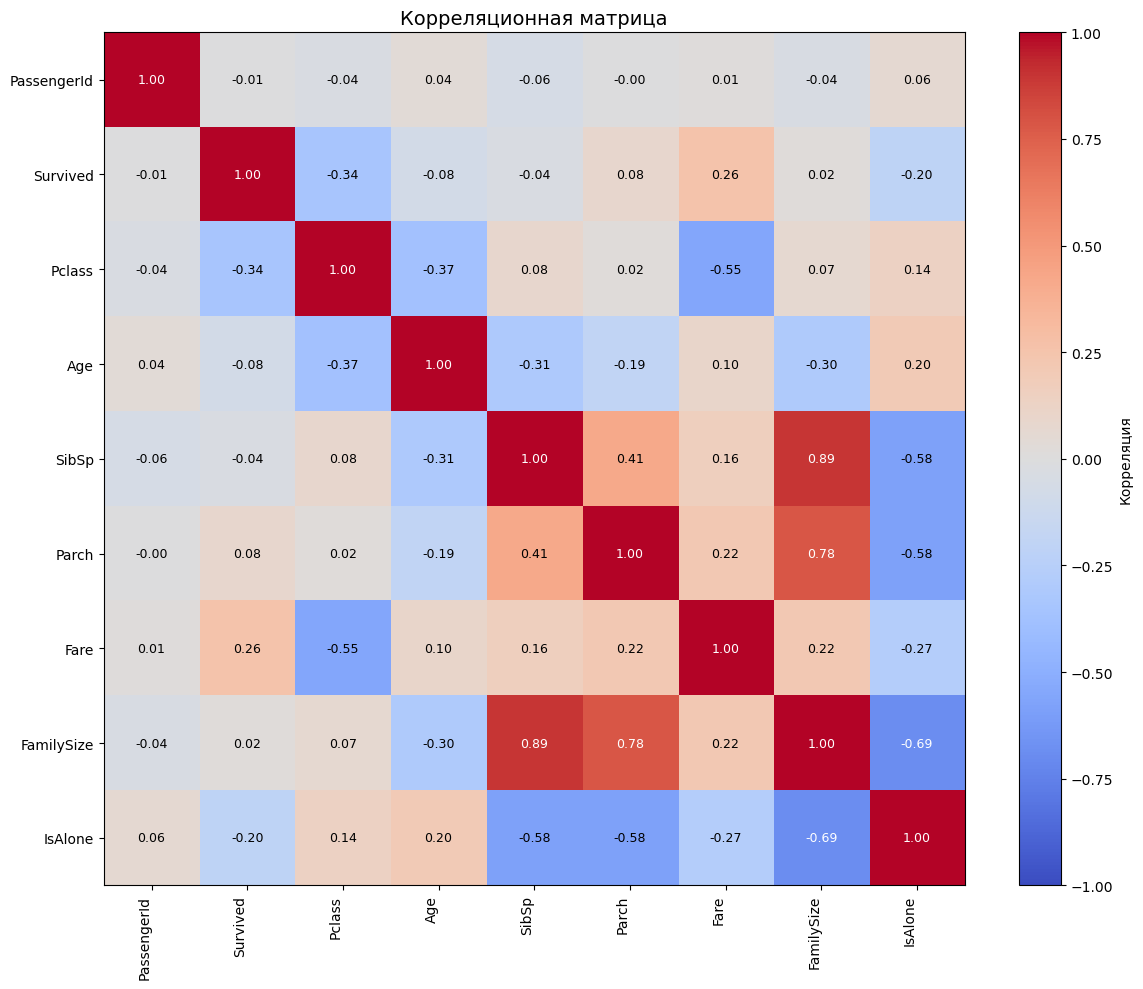

Корреляция с Survived:
Fare           0.257307
Parch          0.081629
FamilySize     0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
IsAlone       -0.203367
Pclass        -0.338481
Name: Survived, dtype: float64


In [16]:
numeric_data = train.select_dtypes(include=[np.number])
corr = numeric_data.corr()

plt.figure(figsize=(12, 10))
im = plt.imshow(corr, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(im, label='Корреляция')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        color = 'white' if abs(corr.iloc[i, j]) > 0.6 else 'black'
        plt.text(j, i, f'{corr.iloc[i, j]:.2f}', 
                ha='center', va='center', fontsize=9, color=color)

plt.title('Корреляционная матрица', fontsize=14)
plt.tight_layout()
plt.show()

print("Корреляция с Survived:")
print(corr['Survived'].drop('Survived').sort_values(ascending=False))

Age: выбросов = 11, границы = [-6.7, 64.8]
Fare: выбросов = 116, границы = [-26.7, 65.6]


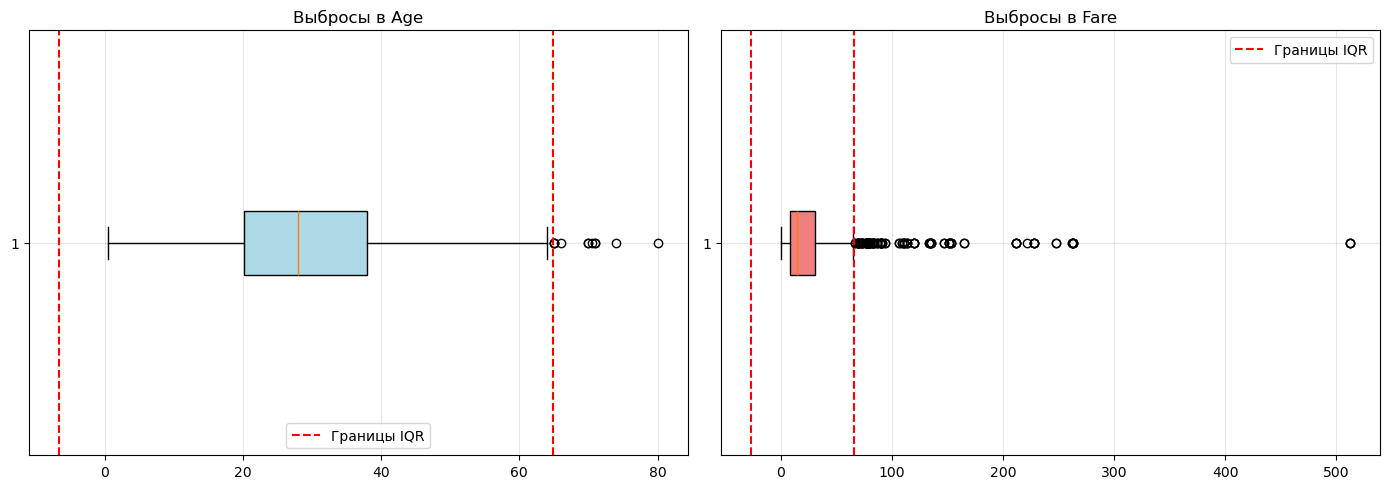

In [17]:
def find_outliers_iqr(series):
    Q1 = np.percentile(series.dropna(), 25)
    Q3 = np.percentile(series.dropna(), 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = series[(series < lower) | (series > upper)]
    return outliers, lower, upper, Q1, Q3

age_out, age_l, age_h, _, _ = find_outliers_iqr(train['Age'])
fare_out, fare_l, fare_h, _, _ = find_outliers_iqr(train['Fare'])

print(f"Age: выбросов = {len(age_out)}, границы = [{age_l:.1f}, {age_h:.1f}]")
print(f"Fare: выбросов = {len(fare_out)}, границы = [{fare_l:.1f}, {fare_h:.1f}]")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].boxplot(train['Age'].dropna(), vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightblue'))
axes[0].axvline(age_l, color='red', linestyle='--', label='Границы IQR')
axes[0].axvline(age_h, color='red', linestyle='--')
axes[0].set_title('Выбросы в Age')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].boxplot(train['Fare'].dropna(), vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightcoral'))
axes[1].axvline(fare_l, color='red', linestyle='--', label='Границы IQR')
axes[1].axvline(fare_h, color='red', linestyle='--')
axes[1].set_title('Выбросы в Fare')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

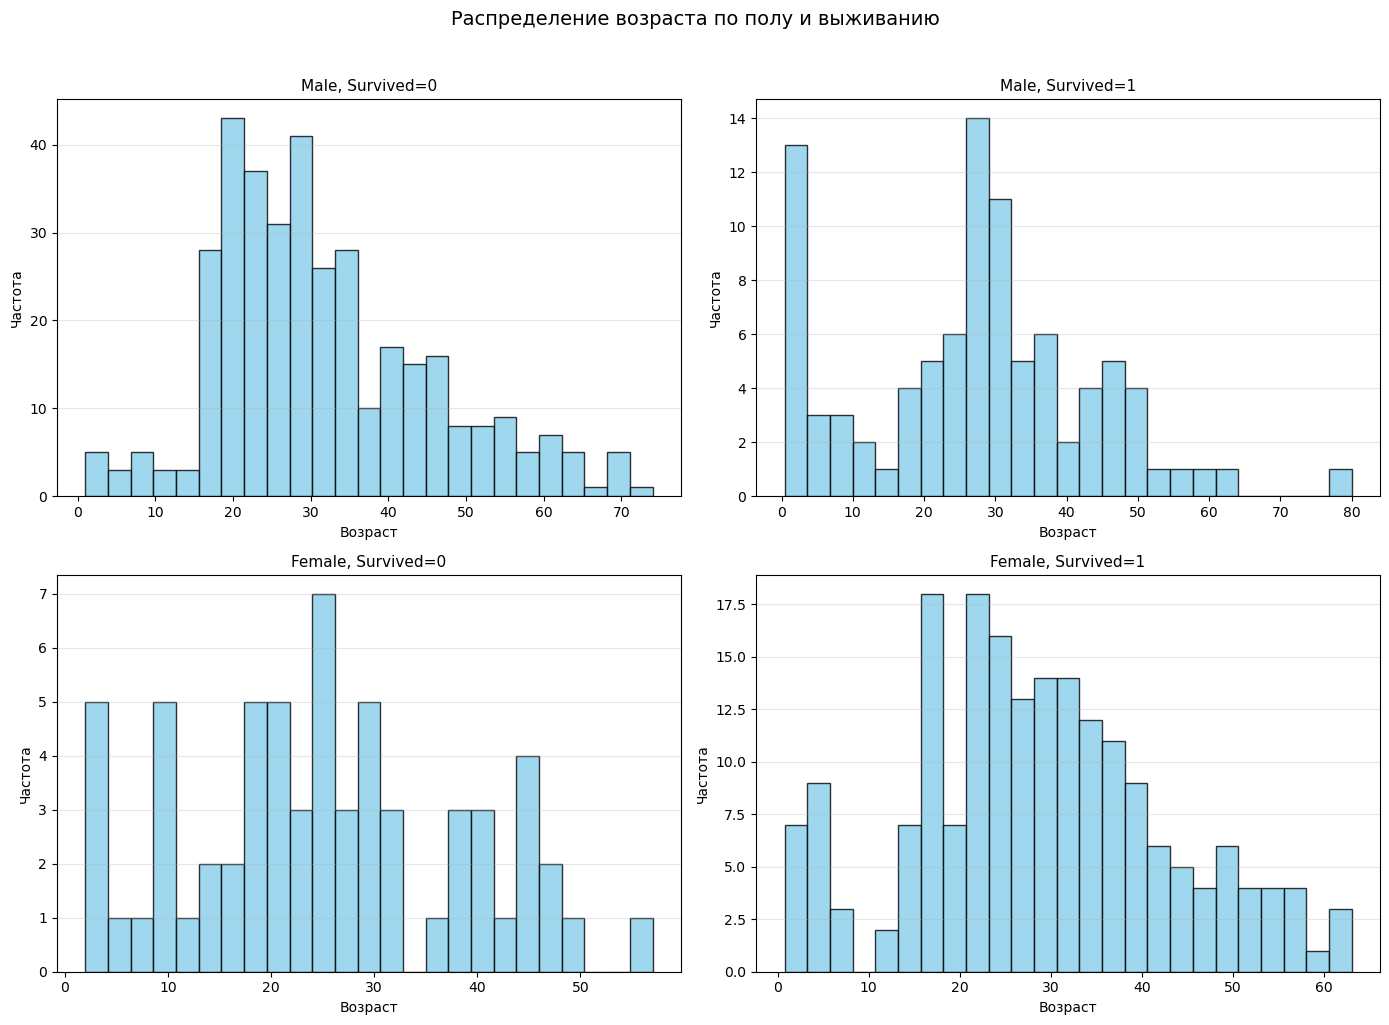

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, (sex, survived) in enumerate([('male', 0), ('male', 1), ('female', 0), ('female', 1)]):
    row = idx // 2
    col = idx % 2
    subset = train[(train['Sex'] == sex) & (train['Survived'] == survived)]['Age'].dropna()
    
    axes[row, col].hist(subset, bins=25, color='skyblue', edgecolor='black', alpha=0.8)
    axes[row, col].set_title(f'{sex.capitalize()}, Survived={survived}', fontsize=11)
    axes[row, col].set_xlabel('Возраст')
    axes[row, col].set_ylabel('Частота')
    axes[row, col].grid(axis='y', alpha=0.3)

plt.suptitle('Распределение возраста по полу и выживанию', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

In [19]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)
train['IsChild'] = (train['Age'] < 16).astype(int)
train['Pclass_Sex'] = train['Pclass'].astype(str) + '_' + train['Sex']

print("Новые признаки:")
print(train[['FamilySize', 'IsAlone', 'IsChild', 'Pclass_Sex']].head())

alone_rates = train.groupby('IsAlone')['Survived'].mean()

print(f"Выжили одни: {alone_rates[1]*100:.1f}%")
print(f"Выжили с семьёй: {alone_rates[0]*100:.1f}%")

Новые признаки:
   FamilySize  IsAlone  IsChild Pclass_Sex
0           2        0        0     3_male
1           2        0        0   1_female
2           1        1        0   3_female
3           2        0        0   1_female
4           1        1        0     3_male
Выжили одни: 30.4%
Выжили с семьёй: 50.6%


In [20]:
cat_cols = config.CONFIG['preprocessing']['categorical_cols']
encode_method = config.CONFIG['preprocessing']['encode_method']

print(f"Категориальные признаки: {cat_cols}")
print(f"Метод кодирования: {encode_method}")

NameError: name 'config' is not defined

In [ ]:
cat_cols = ['Sex', 'Embarked', 'Pclass']
for col in cat_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(f"Уникальных значений: {df[col].nunique()}")
        print(f"Тип данных: {df[col].dtype}")
        print(f"Значения: {df[col].unique()}")



Sex:
Уникальных значений: 2
Тип данных: object
Значения: ['male' 'female']

Embarked:
Уникальных значений: 3
Тип данных: object
Значения: ['S' 'C' 'Q']

Pclass:
Уникальных значений: 3
Тип данных: int64
Значения: [3 1 2]


лейбл и ван хот энкоде

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
df = df.copy()

le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])
print(le_sex.classes_)
print(df['Sex'].unique())



['female' 'male']
[1 0]


In [ ]:
ohe = OneHotEncoder(sparse_output=False, drop=None)

embarked_encoded = ohe.fit_transform(df[['Embarked']])

embarked_df = pd.DataFrame(
    embarked_encoded,
    columns=[f'Embarked_{cat}' for cat in ohe.categories_[0]],
    index=df.index
)

print(embarked_df)

     Embarked_C  Embarked_Q  Embarked_S
0           0.0         0.0         1.0
1           1.0         0.0         0.0
2           0.0         0.0         1.0
3           0.0         0.0         1.0
4           0.0         0.0         1.0
..          ...         ...         ...
886         0.0         0.0         1.0
887         0.0         0.0         1.0
888         0.0         0.0         1.0
889         1.0         0.0         0.0
890         0.0         1.0         0.0

[891 rows x 3 columns]


In [ ]:
df = pd.concat([df, embarked_df], axis=1)
df = df.drop(columns=['Embarked'])

In [ ]:
df['Pclass'].unique()

array([3, 1, 2])

In [ ]:
print(df.shape)
print(df.columns.to_list())
print(df[['Sex', 'Pclass', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].head())


(891, 13)
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
   Sex  Pclass  Embarked_C  Embarked_Q  Embarked_S
0    1       3         0.0         0.0         1.0
1    0       1         1.0         0.0         0.0
2    0       3         0.0         0.0         1.0
3    0       1         0.0         0.0         1.0
4    1       3         0.0         0.0         1.0


In [ ]:
from datetime import datetime

In [ ]:
checkpoint_dir = 'checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)
preprocessed_path = os.path.join(checkpoint_dir, 'train_preprocessed.csv')
df.to_csv(preprocessed_path, index=False)
print(preprocessed_path)
print(df.shape)
print(f"{os.path.getsize(preprocessed_path) / 1024:.2f} KB")

checkpoints\train_preprocessed.csv
(891, 11)
82.07 KB


In [ ]:
preprocessing_metadata = {
    'encoders': {
        'sex_label_encoder': {
            'classes': le_sex.classes_.tolist(),
            'mapping': {cls: int(idx) for idx, cls in enumerate(le_sex.classes_)}
        },
        'embarked_onehot_encoder': {
            'categories': ohe.categories_[0].tolist(),
            'feature_names': [f'Embarked_{cat}' for cat in ohe.categories_[0]]
        }
    },
    
    'scaler_params': {
        'Age': {
            'mean': float(df['Age'].mean()),
            'std': float(df['Age'].std())
        },
        'Fare': {
            'mean': float(df['Fare'].mean()),
            'std': float(df['Fare'].std())
        }
    },
    
    'dropped_columns': ['Cabin', 'Embarked', 'Fare_log'],
    
    'final_columns': df.columns.tolist(),
    
    'target_column': 'Survived',
    'id_column': 'PassengerId',
    
    'preprocessing_config': {
        'fill_age_with': config.CONFIG['preprocessing']['fill_age_with'],
        'fill_embarked_with': config.CONFIG['preprocessing']['fill_embarked_with'],
        'drop_cabin': config.CONFIG['preprocessing']['drop_cabin'],
        'log_fare': config.CONFIG['preprocessing']['log_fare'],
    },
    
    'dataset_info': {
        'original_shape': train.shape,
        'preprocessed_shape': df.shape,
        'missing_values': int(df.isnull().sum().sum()),
        'duplicate_rows': int(df.duplicated().sum()),
        'numeric_columns': df.select_dtypes(include=[np.number]).columns.tolist(),
        'categorical_columns': df.select_dtypes(include=['object']).columns.tolist()
    },
    
    'saved_at': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    
    'version': '1.0'
}

NameError: name 'le_sex' is not defined

In [ ]:
metadata_pickle_path = os.path.join(checkpoint_dir, 'preprocessing_metadata.pkl')
with open(metadata_pickle_path, 'wb') as f:
    pickle.dump(preprocessing_metadata, f)
print(metadata_pickle_path)
print(f"{os.path.getsize(metadata_pickle_path) / 1024:.2f} KB")

checkpoints\preprocessing_metadata.pkl
0.88 KB


In [ ]:
metadata_json_path = os.path.join(checkpoint_dir, 'preprocessing_metadata.json')
metadata_json = {
    'dropped_columns': preprocessing_metadata['dropped_columns'],
    'final_columns': preprocessing_metadata['final_columns'],
    'target_column': preprocessing_metadata['target_column'],
    'id_column': preprocessing_metadata['id_column'],
    'preprocessing_config': preprocessing_metadata['preprocessing_config'],
    'saved_at': preprocessing_metadata['saved_at'],
    'dataset_info': preprocessing_metadata['dataset_info'],
    'encoders_summary': preprocessing_metadata['encoders'],
    'scaler_params': preprocessing_metadata['scaler_params']
}
with open(metadata_json_path, 'w', encoding='utf-8') as f:
    json.dump(metadata_json, f, indent=2, ensure_ascii=False)
print(metadata_json_path)

checkpoints\preprocessing_metadata.json


In [ ]:
encoders_path = os.path.join(checkpoint_dir, 'encoders.pkl')
encoders_to_save = {
    'sex_label_encoder': le_sex,
    'embarked_onehot_encoder': ohe
}
with open(encoders_path, 'wb') as f:
    pickle.dump(encoders_to_save, f)
print(encoders_path)

checkpoints\encoders.pkl
